In [1]:
import warnings

# Imports
import pandas as pd
import numpy as np
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
seed = 1234
dataset = load_dataset("stanfordnlp/imdb")
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset["test"])
#df_train

# Current best parameters
default = {
    "hidden_layer_sizes": np.array([100]),
    "activation": "relu",
    "solver": "adam",
    "alpha": 0.0001,
    "batch_size": "auto",
    "learning_rate": "adaptive",
    "learning_rate_init": 0.001,
    "max_iter": 200,
    "random_state": seed
}

In [5]:
def build_model(params: dict, X_fulltrain, Y_fulltrain, X_test, Y_test):
    trainX = X_fulltrain
    trainY = Y_fulltrain
    # Build classifier
    clf = MLPClassifier(**params)
    clf.fit(trainX, trainY)
    # Predictions
    y_trainpred = clf.predict(X_fulltrain)
    y_testpred = clf.predict(X_test)
    print(f"Classification for training data: {classification_report(Y_fulltrain, y_trainpred)}")
    print(f"Classification for testing data: {classification_report(Y_test, y_testpred)}")
    return {"Train": accuracy_score(Y_fulltrain, y_trainpred), "Test": accuracy_score(Y_test, y_testpred)}
# Plot error
def plot_error(X: list, train: list, test: list, xlabel: str):
    plt.plot(X, train, label="Train", marker=".", color="red")
    plt.plot(X, test, label="Test", marker=".", color="green")
    plt.xlabel = xlabel
    plt.ylabel = "Accuracy"
    plt.legend()
    plt.show()
# Tester
def tester(feature_testing: str, feature_list: list, x_values: list):
    train_error = []
    test_error = []
    for feature in feature_list:
        copy_params = deepcopy(default)
        copy_params[feature_testing] = feature
        print(f"Building model {feature_testing}: {feature}")
        err_dict = build_model(copy_params, X_train, Y_train, X_test, Y_test)
        train_error.append(err_dict["Train"])
        test_error.append(err_dict["Test"])
    plot_error(x_values, train_error, test_error, xlabel=feature_testing)

In [4]:
# Vectorize
vectorizer = TfidfVectorizer()
print("Vectorizing train...")
X_train = vectorizer.fit_transform(df_train["text"])
Y_train = df_train["label"]
print("Vectorizing test...")
X_test = vectorizer.transform(df_test["text"])
Y_test = df_test["label"]

# Scale
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Vectorizing train...
Vectorizing test...


Building model hidden_layer_sizes: [25]
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Classification for testing data:               precision    recall  f1-score   support

           0       0.76      0.81      0.79     12500
           1       0.80      0.75      0.77     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000

Building model hidden_layer_sizes: [50]
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

 

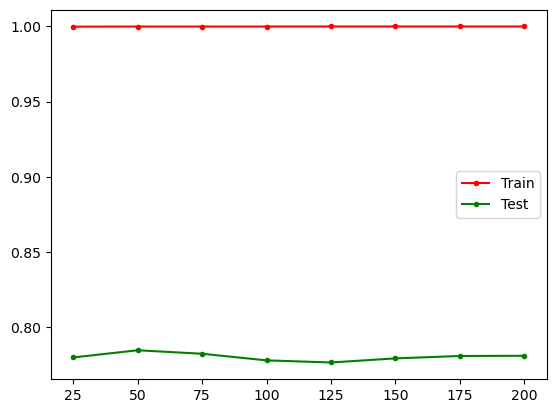

In [6]:
# Test layers
layer_sizes = [np.array([size]) for size in np.arange(25, 201, 25)]
layer_xs = [size for size in np.arange(25, 201, 25)]
tester('hidden_layer_sizes', layer_sizes, x_values = layer_xs)

Building model hidden_layer_sizes: [50 25]
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Classification for testing data:               precision    recall  f1-score   support

           0       0.76      0.80      0.78     12500
           1       0.79      0.75      0.77     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000

Building model hidden_layer_sizes: [50 50]
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12

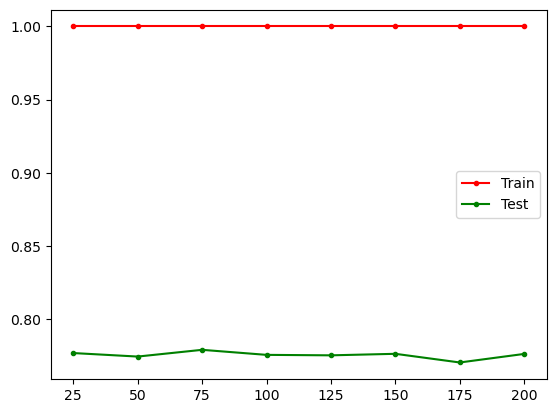

In [7]:
# Test second layer
layer_sizes = [np.array([50, size]) for size in np.arange(25, 201, 25)]
layer_xs = [size for size in np.arange(25, 201, 25)]
tester('hidden_layer_sizes', layer_sizes, x_values = layer_xs)

Building model alpha: 0.0001
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Classification for testing data:               precision    recall  f1-score   support

           0       0.77      0.82      0.79     12500
           1       0.80      0.75      0.78     12500

    accuracy                           0.78     25000
   macro avg       0.79      0.78      0.78     25000
weighted avg       0.79      0.78      0.78     25000

Building model alpha: 0.0101
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy           

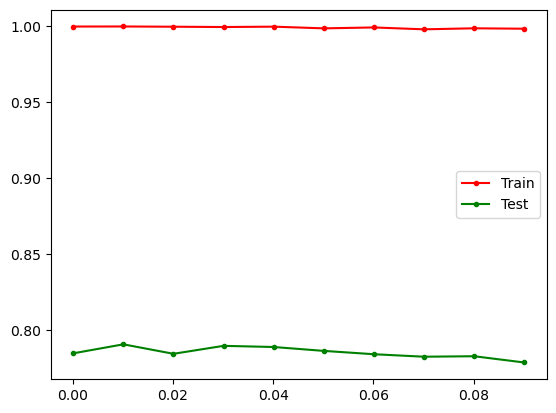

In [8]:
# more layers did not improve accuracy
# Try to reduce overfitting
default['hidden_layer_sizes'] = np.array([50])
alphas = np.arange(0.0001, 0.1, 0.01)
tester('alpha', alphas, alphas)

Building model batch_size: 100
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Classification for testing data:               precision    recall  f1-score   support

           0       0.78      0.82      0.80     12500
           1       0.81      0.77      0.79     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000

Building model batch_size: 150
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy       

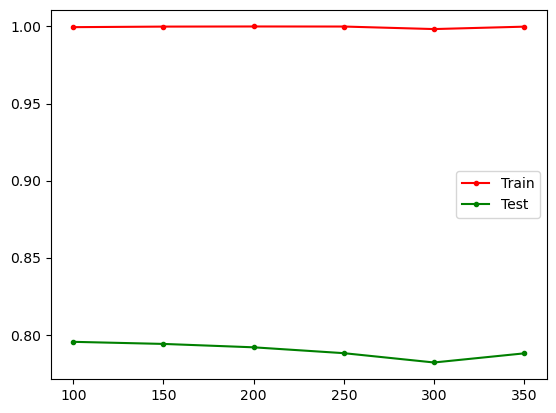

In [9]:
default['alpha'] = 0.01
# Change batch sie
batch_sizes = np.arange(100, 351, 50)
tester('batch_size', batch_sizes, batch_sizes)

Building model learning_rate_init: 0.001
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Classification for testing data:               precision    recall  f1-score   support

           0       0.78      0.82      0.80     12500
           1       0.81      0.77      0.79     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000

Building model learning_rate_init: 0.0061
Classification for training data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

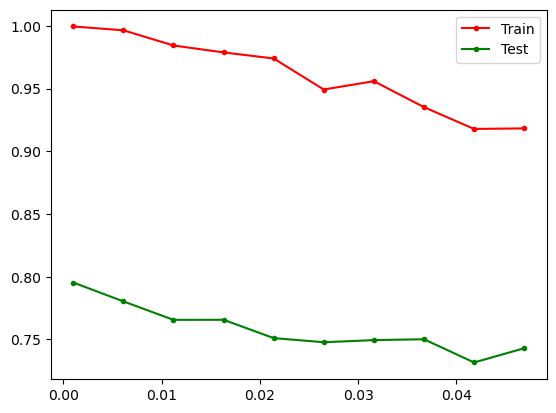

In [10]:
default['batch_size'] = 100
# Tweak the learning rate initialization
learning_rate_inits = np.arange(0.001, 0.05, 0.0051)
tester('learning_rate_init', learning_rate_inits, learning_rate_inits)

In [11]:
default

{'hidden_layer_sizes': array([50]),
 'activation': 'relu',
 'solver': 'adam',
 'alpha': 0.01,
 'batch_size': 100,
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'random_state': 1234}

In [ ]:
# Show misclassified
results = X_test.copy()
results['Actual'] = Y_test
# results['Pred'] = ypred
misclassified = results[results['Actual'] != results['Predicted']]
misclassified

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     12500
           1       0.79      0.75      0.77     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



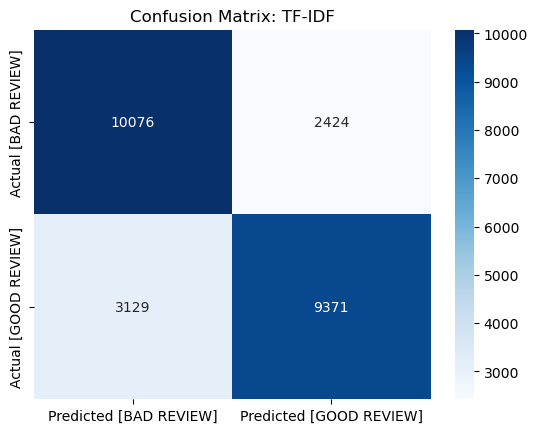

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
clf = MLPClassifier(random_state = seed)
clf.fit(X_train, Y_train)
y_testpred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_testpred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted [BAD REVIEW]', 'Predicted [GOOD REVIEW]'], yticklabels=['Actual [BAD REVIEW]', 'Actual [GOOD REVIEW]'])
plt.title("Confusion Matrix: TF-IDF")
print(classification_report(Y_test, y_testpred))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     12500
           1       0.81      0.77      0.79     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



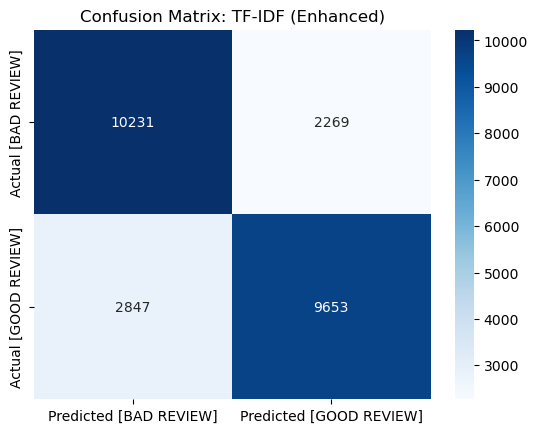

In [16]:
clf = MLPClassifier(**default)
clf.fit(X_train, Y_train)
y_testpred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_testpred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted [BAD REVIEW]', 'Predicted [GOOD REVIEW]'], yticklabels=['Actual [BAD REVIEW]', 'Actual [GOOD REVIEW]'])
plt.title("Confusion Matrix: TF-IDF (Enhanced)")
print(classification_report(Y_test, y_testpred))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.show()